In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('/content/EastWestAirlines.xlsx')  # Load your .xlsx file here

In [3]:
from sklearn.datasets import make_blobs
df, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

In [4]:
# Convert to DataFrame if needed
df = pd.DataFrame(df, columns=['Feature1', 'Feature2'])

In [5]:
# Data Preprocessing
# 1. Handling missing values (if any)
df.fillna(df.mean(), inplace=True)

In [6]:
# 2. Outlier Removal (optional - using Z-score method)
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with any Z-score > 3

In [8]:
# 3. Feature Scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

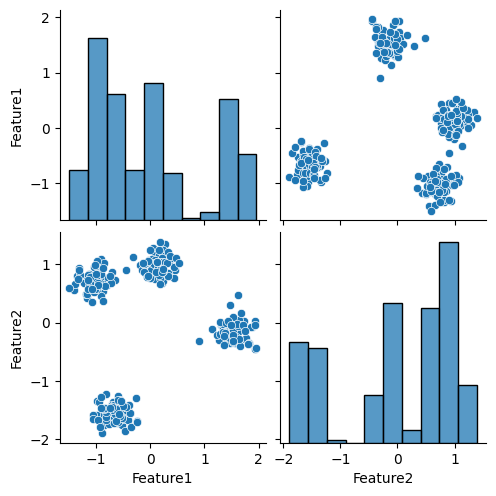

In [9]:
# Exploratory Data Analysis (EDA)
# Visualize the data distribution
sns.pairplot(pd.DataFrame(scaled_df, columns=df.columns))
plt.show()

In [10]:
# PCA for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_df)

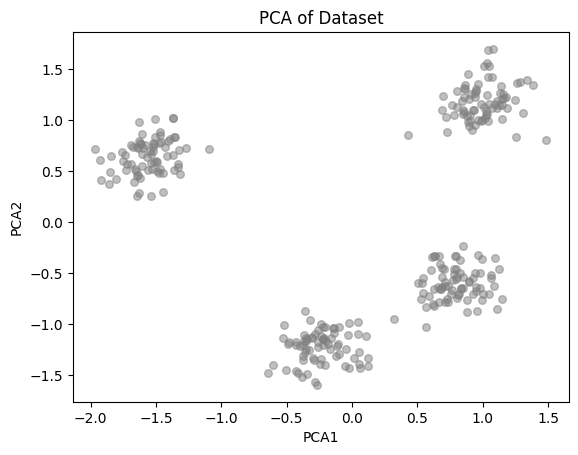

In [11]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='gray', marker='o', s=30, alpha=0.5)
plt.title('PCA of Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

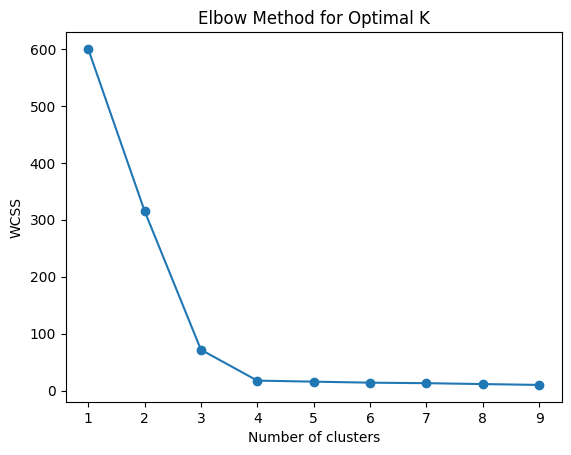

In [13]:
# Implementing Clustering Algorithms
# K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Fit KMeans with optimal K (let's say k=4 for this example)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

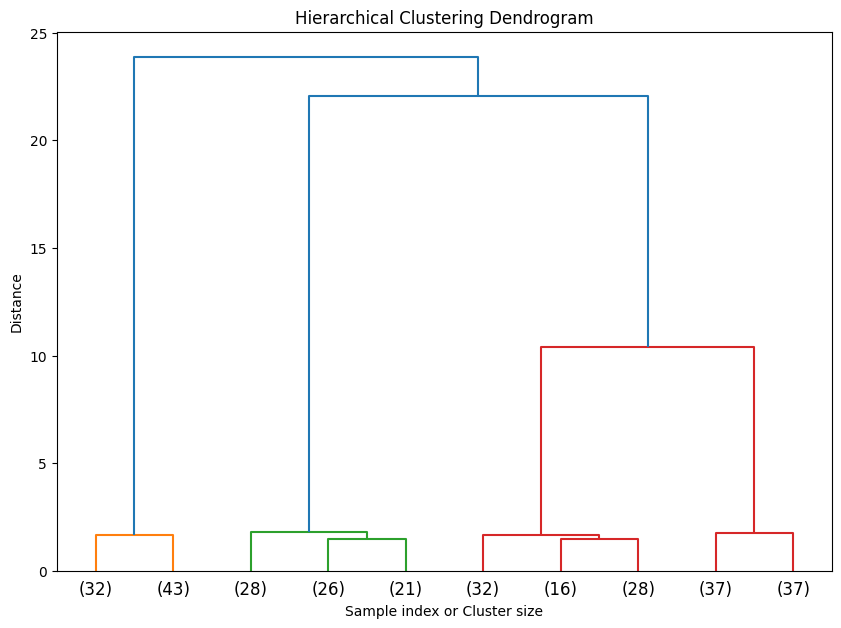

In [15]:
# Hierarchical Clustering
# Plotting the dendrogram to determine optimal linkage
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or Cluster size')
plt.ylabel('Distance')
plt.show()

In [16]:
# Fit Hierarchical Clustering with updated parameter
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_df)

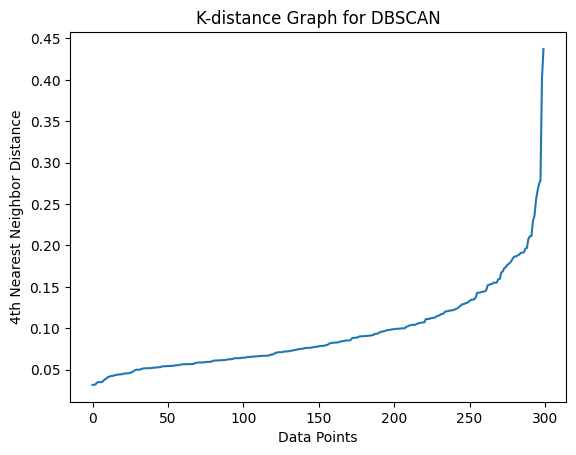

In [17]:
# DBSCAN Clustering
# Choosing optimal eps using K-distance graph
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [18]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)

In [19]:
# Cluster Analysis and Interpretation
# Creating a DataFrame with the cluster labels
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

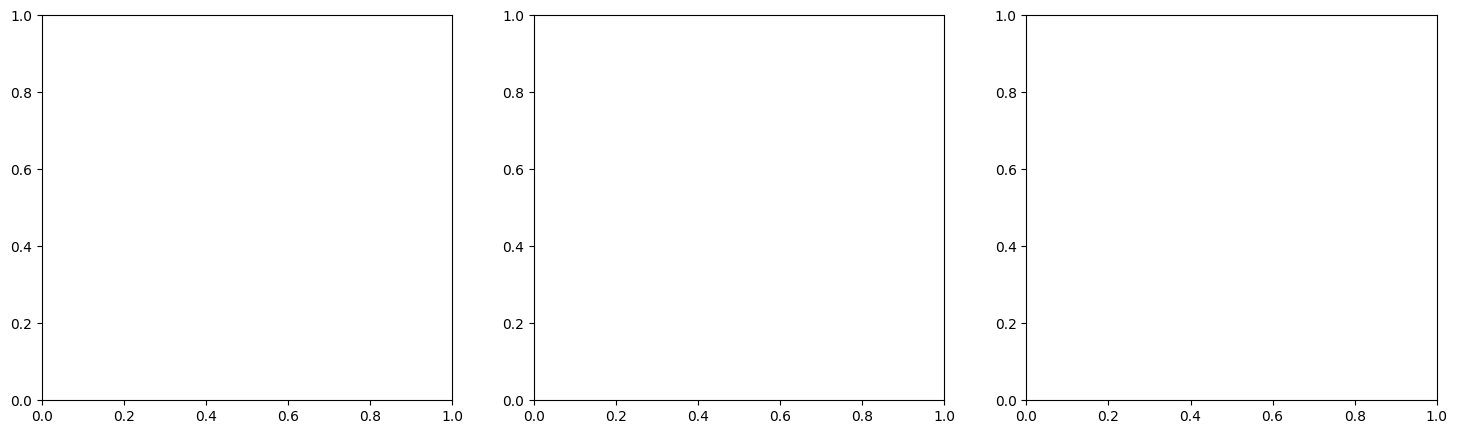

In [20]:
# Visualize Clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

In [21]:
# K-Means plot
axes[0].scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=30)
axes[0].set_title('K-Means Clustering')

Text(0.5, 1.0, 'K-Means Clustering')

In [22]:
# Hierarchical plot
axes[1].scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', s=30)
axes[1].set_title('Hierarchical Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

In [23]:
# DBSCAN plot
axes[2].scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', s=30)
axes[2].set_title('DBSCAN Clustering')

Text(0.5, 1.0, 'DBSCAN Clustering')

In [24]:
plt.show()

In [25]:
from sklearn.metrics import silhouette_score


In [26]:
# Evaluation with Silhouette Score
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'Undefined'


In [27]:
print("Silhouette Score for K-Means:", kmeans_silhouette)
print("Silhouette Score for Hierarchical Clustering:", hierarchical_silhouette)
print("Silhouette Score for DBSCAN:", dbscan_silhouette)

Silhouette Score for K-Means: 0.7974739889632729
Silhouette Score for Hierarchical Clustering: 0.7974739889632729
Silhouette Score for DBSCAN: 0.7435946016452469
